<a href="https://colab.research.google.com/github/jreyes0188/Proyecto-Final-DataScience/blob/main/TP1/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Población Mundial desde 1950 a 2021**

# 1. Entendimiento del Problema

##Resumen

*El proyecto se enfoca en analizar la evolución de la población mundial desde 1950 hasta 2021, desglosada por diferentes grupos etarios, utilizando una variedad de modelos de regresión para identificar y predecir tendencias poblacionales. Se formularon y probaron cuatro hipótesis principales, cada una asociada con un algoritmo de regresión específico: regresión lineal, máquinas de vectores de soporte (SVM), árboles de decisión y K-nearest neighbors (K-NN).*

##Objetivo

*El objetivo principal del proyecto es identificar y modelar las tendencias de crecimiento de la población global, desglosada por rangos de edad, y proporcionar predicciones precisas. Estas predicciones pueden ayudar a los responsables de la toma de decisiones en el diseño de políticas y estrategias demográficas, económicas y sociales. Además, el proyecto busca ofrecer una comprensión detallada de cómo diferentes segmentos de la población han cambiado a lo largo del tiempo, lo cual es crucial para la planificación a largo plazo en diversas áreas.*

##Contexto Comercial

*Global Demographics Insights es una consultora líder en análisis de datos demográficos, con presencia internacional y oficinas en múltiples ciudades. La empresa se especializa en proporcionar análisis detallados y previsiones sobre tendencias poblacionales a una amplia gama de clientes, incluyendo gobiernos, organizaciones no gubernamentales, instituciones académicas y corporaciones.*

*Global Demographics Insights, en su posición de líder del mercado, se dedica a ayudar a sus clientes a comprender y anticipar los cambios demográficos para tomar decisiones informadas y estratégicas. La empresa reconoce la importancia crucial de las dinámicas poblacionales en áreas como la planificación urbana, la salud pública, la educación y el desarrollo económico. Por lo tanto, el análisis detallado y la modelización precisa de la población mundial y sus tendencias son esenciales para diseñar políticas efectivas y estrategias comerciales.*

##Hipotesís

- **Crecimiento Lineal de la Población Total:** La regresión lineal mostró que la población total en muchos países ha seguido una tendencia de crecimiento constante, reflejando un aumento continuo en la población mundial.

- **Crecimiento de la Población de Jóvenes:** El modelo SVM destacó que la población joven ha experimentado un crecimiento significativo, con variaciones notables en diferentes décadas, posiblemente debido a políticas de natalidad y eventos socioeconómicos.

- **Crecimiento No Lineal de la Población Adulta:** Los árboles de decisión capturaron las complejidades y fluctuaciones en el crecimiento de la población adulta, identificando periodos de aceleración y desaceleración en varias regiones.

- **Crecimiento de la Población de Ancianos:** El modelo K-NN reveló patrones específicos en la población anciana, mostrando cómo los aumentos en la expectativa de vida y las mejoras en la atención médica han influido en el crecimiento de este grupo etario.



# 2. Extracción de Datos

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.svm import SVR


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df = pd.read_csv('/content/drive/MyDrive/Data Science I - CoderHouse/Proyecto Final Data Science/Poblacion Mundial 1950-2021.csv', sep = ';')
df

,Nombre_País,Año,Población de 1 a 4 años,Población de 5 a 9 años,Población de 10 a 14 años,Población de 15 a 19 años,Población de 20 a 29 años,Población de 30 a 39 años,Población de 40 a 49 años,Población de 50 a 59 años,Población de 60 a 69 años,Población de 70 a 79 años,Población de 80 a 89 años,Población de 90 a 99 años
0,Afghanistan,1950,946547.0,966210,854363,757113,1241348,909953,661807,467170,271905,92691,9499,123
1,Afghanistan,1951,947489.0,991791,866796,768616,1260904,922765,667015,468881,273286,94358,10155,118
2,Afghanistan,1952,942827.0,1017993,878857,781411,1280288,935638,672491,470898,274852,96026,10721,139
3,Afghanistan,1953,943151.0,1039950,891707,794308,1298803,948321,678064,472969,276577,97705,11254,166
4,Afghanistan,1954,950233.0,1055592,907651,806216,1316768,961484,684153,475117,278210,99298,11793,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18139,Zimbabwe,2017,1822883.0,2090939,1839585,1690993,2422873,2021973,1088878,570769,467775,200927,59789,8974
18140,Zimbabwe,2018,1817052.0,2156068,1851988,1732035,2474502,2058928,1155537,585529,476214,208587,59700,9299
18141,Zimbabwe,2019,1812896.0,2203375,1882283,1759205,2546398,2085636,1220993,606266,479827,218763,60339,9546
18142,Zimbabwe,2020,1816765.0,2229093,1932823,1776240,2640150,2101852,1291333,631541,476507,231604,61546,9629


### Descripción de Variables

In [33]:
df.info()

"""
Descripción de las Variables

Nombre_País = Nombre de cada País

Año = Años desde 1950 a 2021

Población de 1 a 4 años = Cantidad de personas en el rango de edad de 1 a 4 años

Población de 5 a 9 años = Cantidad de personas en el rango de edad de 5 a 9 años

Población de 10 a 14 años = Cantidad de personas en el rango de edad de 10 a 14 años

Población de 15 a 19 años = Cantidad de personas en el rango de edad de 15 a 19 años

Población de 20 a 29 años = Cantidad de personas en el rango de edad de 20 a 29 años

Población de 30 a 39 años = Cantidad de personas en el rango de edad de 30 a 39 años

Población de 40 a 49 años = Cantidad de personas en el rango de edad de 40 a 49 años

Población de 50 a 59 años = Cantidad de personas en el rango de edad de 50 a 59 años

Población de 60 a 69 años = Cantidad de personas en el rango de edad de 60 a 69 años

Población de 70 a 79 años = Cantidad de personas en el rango de edad de 70 a 79 años

Población de 80 a 89 años = Cantidad de personas en el rango de edad de 80 a 89 años

Población de 90 a 99 años = Cantidad de personas en el rango de edad de 90 a 99 años
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18144 entries, 0 to 18143
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Nombre_País                18144 non-null  object 
 1   Año                        18144 non-null  int64  
 2   Población de 1 a 4 años    18144 non-null  float64
 3   Población de 5 a 9 años    18144 non-null  int64  
 4   Población de 10 a 14 años  18144 non-null  int64  
 5   Población de 15 a 19 años  18144 non-null  int64  
 6   Población de 20 a 29 años  18144 non-null  int64  
 7   Población de 30 a 39 años  18144 non-null  int64  
 8   Población de 40 a 49 años  18144 non-null  int64  
 9   Población de 50 a 59 años  18144 non-null  int64  
 10  Población de 60 a 69 años  18144 non-null  int64  
 11  Población de 70 a 79 años  18144 non-null  int64  
 12  Población de 80 a 89 años  18144 non-null  int64  
 13  Población de 90 a 99 años  18144 non-null  int

'\nDescripción de las Variables\n\nNombre_País = Nombre de cada País\n\nAño = Años desde 1950 a 2021\n\nPoblación de 1 a 4 años = Cantidad de personas en el rango de edad de 1 a 4 años\n\nPoblación de 5 a 9 años = Cantidad de personas en el rango de edad de 5 a 9 años\n\nPoblación de 10 a 14 años = Cantidad de personas en el rango de edad de 10 a 14 años\n\nPoblación de 15 a 19 años = Cantidad de personas en el rango de edad de 15 a 19 años\n\nPoblación de 20 a 29 años = Cantidad de personas en el rango de edad de 20 a 29 años\n\nPoblación de 30 a 39 años = Cantidad de personas en el rango de edad de 30 a 39 años\n\nPoblación de 40 a 49 años = Cantidad de personas en el rango de edad de 40 a 49 años\n\nPoblación de 50 a 59 años = Cantidad de personas en el rango de edad de 50 a 59 años\n\nPoblación de 60 a 69 años = Cantidad de personas en el rango de edad de 60 a 69 años\n\nPoblación de 70 a 79 años = Cantidad de personas en el rango de edad de 70 a 79 años\n\nPoblación de 80 a 89 año

In [34]:
df.shape

(18144, 14)

In [35]:
df.columns

Index(['Nombre_País', 'Año', 'Población de 1 a 4 años',
       'Población de 5 a 9 años', 'Población de 10 a 14 años',
       'Población de 15 a 19 años', 'Población de 20 a 29 años',
       'Población de 30 a 39 años', 'Población de 40 a 49 años',
       'Población de 50 a 59 años', 'Población de 60 a 69 años',
       'Población de 70 a 79 años', 'Población de 80 a 89 años',
       'Población de 90 a 99 años'],
      dtype='object')

In [36]:
# Convertir la columna 'Población de 1 a 4 años' a tipo Int64
df['Población de 1 a 4 años'] = df['Población de 1 a 4 años'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18144 entries, 0 to 18143
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Nombre_País                18144 non-null  object
 1   Año                        18144 non-null  int64 
 2   Población de 1 a 4 años    18144 non-null  int64 
 3   Población de 5 a 9 años    18144 non-null  int64 
 4   Población de 10 a 14 años  18144 non-null  int64 
 5   Población de 15 a 19 años  18144 non-null  int64 
 6   Población de 20 a 29 años  18144 non-null  int64 
 7   Población de 30 a 39 años  18144 non-null  int64 
 8   Población de 40 a 49 años  18144 non-null  int64 
 9   Población de 50 a 59 años  18144 non-null  int64 
 10  Población de 60 a 69 años  18144 non-null  int64 
 11  Población de 70 a 79 años  18144 non-null  int64 
 12  Población de 80 a 89 años  18144 non-null  int64 
 13  Población de 90 a 99 años  18144 non-null  int64 
dtypes: int

In [38]:
# Resumen estadístico de las variables numéricas
df.describe().round(2)

,Año,Población de 1 a 4 años,Población de 5 a 9 años,Población de 10 a 14 años,Población de 15 a 19 años,Población de 20 a 29 años,Población de 30 a 39 años,Población de 40 a 49 años,Población de 50 a 59 años,Población de 60 a 69 años,Población de 70 a 79 años,Población de 80 a 89 años,Población de 90 a 99 años
count,18144.00,1.814400e+04,1.814400e+04,1.814400e+04,1.814400e+04,1.814400e+04,1.814400e+04,1.814400e+04,1.814400e+04,1.814400e+04,1.814400e+04,1.814400e+04,18144.00
mean,1985.50,9.308160e+06,1.084598e+07,1.013164e+07,9.448576e+06,1.683182e+07,1.395268e+07,1.118584e+07,8.448468e+06,5.720224e+06,3.094147e+06,1.045011e+06,128110.83
std,20.78,4.571328e+07,5.377468e+07,5.064992e+07,4.762740e+07,8.583474e+07,7.208640e+07,5.827950e+07,4.394485e+07,2.953087e+07,1.604333e+07,5.843794e+06,820308.60
min,1950.00,1.010000e+02,1.380000e+02,7.300000e+01,1.100000e+02,1.580000e+02,1.370000e+02,1.190000e+02,9.500000e+01,6.400000e+01,3.100000e+01,6.000000e+00,0.00
25%,1967.75,2.457325e+04,2.884375e+04,2.718875e+04,2.573350e+04,4.414950e+04,3.578825e+04,2.642475e+04,1.918700e+04,1.224075e+04,6.124000e+03,1.777000e+03,151.00
50%,1985.50,3.266555e+05,3.835845e+05,3.523760e+05,3.303725e+05,5.982655e+05,4.772000e+05,3.563310e+05,2.592835e+05,1.641180e+05,7.954000e+04,1.974550e+04,1423.50
75%,2003.25,1.620176e+06,1.880442e+06,1.713151e+06,1.545065e+06,2.615002e+06,1.976936e+06,1.499011e+06,1.159134e+06,8.120680e+05,4.156515e+05,1.260082e+05,11836.50
max,2021.00,5.509704e+08,6.836118e+08,6.599343e+08,6.235761e+08,1.210493e+09,1.165207e+09,9.764072e+08,8.513569e+08,5.980671e+08,3.304912e+08,1.318356e+08,22223974.00


In [39]:
# Comprobación de valores nulos
df.isnull().sum()

Nombre_País                  0
Año                          0
Población de 1 a 4 años      0
Población de 5 a 9 años      0
Población de 10 a 14 años    0
Población de 15 a 19 años    0
Población de 20 a 29 años    0
Población de 30 a 39 años    0
Población de 40 a 49 años    0
Población de 50 a 59 años    0
Población de 60 a 69 años    0
Población de 70 a 79 años    0
Población de 80 a 89 años    0
Población de 90 a 99 años    0
dtype: int64

In [40]:
# Valores únicos por columna
valores_unicos = df.nunique()
print("Valores Únicos por Columna:")
print(valores_unicos)


Valores Únicos por Columna:
Nombre_País                    252
Año                             72
Población de 1 a 4 años      17256
Población de 5 a 9 años      17393
Población de 10 a 14 años    17324
Población de 15 a 19 años    17285
Población de 20 a 29 años    17652
Población de 30 a 39 años    17544
Población de 40 a 49 años    17379
Población de 50 a 59 años    17148
Población de 60 a 69 años    16810
Población de 70 a 79 años    16100
Población de 80 a 89 años    14212
Población de 90 a 99 años     9132
dtype: int64


In [47]:
# Excluir las columnas no numéricas
df_numerico = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr().round(2)

# Imprimir la matriz de correlación
print("Matriz de Correlación:")
print(matriz_correlacion)

"""
En este análisis, hemos calculado la matriz de correlación de las columnas numéricas presentes en el DataFrame. La matriz de correlación es una
herramienta estadística que nos permite identificar la relación lineal entre diferentes variables. Los valores de la correlación varían entre
-1 y 1, donde:

1 indica una correlación positiva perfecta: a medida que una variable aumenta, la otra también lo hace en la misma proporción.
-1 indica una correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye en la misma proporción.
0 indica que no hay una correlación lineal entre las variables.
"""

Matriz de Correlación:
                            Año  Población de 1 a 4 años  \
Año                        1.00                     0.04   
Población de 1 a 4 años    0.04                     1.00   
Población de 5 a 9 años    0.05                     1.00   
Población de 10 a 14 años  0.05                     0.99   
Población de 15 a 19 años  0.06                     0.99   
Población de 20 a 29 años  0.07                     0.98   
Población de 30 a 39 años  0.08                     0.96   
Población de 40 a 49 años  0.08                     0.93   
Población de 50 a 59 años  0.08                     0.92   
Población de 60 a 69 años  0.09                     0.90   
Población de 70 a 79 años  0.09                     0.87   
Población de 80 a 89 años  0.11                     0.77   
Población de 90 a 99 años  0.13                     0.63   
Población Total            0.07                     0.97   

                           Población de 5 a 9 años  Población de 10 a 14 año

In [24]:
# Identificación de valores atípicos
def detectar_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return outliers

# Detectar outliers
outliers = detectar_outliers(df.select_dtypes(include=['int64', 'float64']))
print("Valores Atípicos Detectados:")
print(outliers.sum())

# Tratamiento de outliers: Imputación con la mediana
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Imputar outliers con la mediana
    median = df[column].median()
    df.loc[df[column] < lower_bound, column] = median
    df.loc[df[column] > upper_bound, column] = median

"""
Este análisis de valores atípicos nos proporciona una comprensión detallada de la dispersión de los datos y la presencia de valores extremos en
cada variable, lo cual es fundamental para garantizar la precisión y la robustez de los modelos predictivos que se desarrollarán a partir de estos
datos.
"""


Valores Atípicos Detectados:
Año                             0
Población de 1 a 4 años      2217
Población de 5 a 9 años      2279
Población de 10 a 14 años    2195
Población de 15 a 19 años    2057
Población de 20 a 29 años    1896
Población de 30 a 39 años    1761
Población de 40 a 49 años    1717
Población de 50 a 59 años    1921
Población de 60 a 69 años    2069
Población de 70 a 79 años    2122
Población de 80 a 89 años    2433
Población de 90 a 99 años    2672
dtype: int64


'\nEste análisis de valores atípicos nos proporciona una comprensión detallada de la dispersión de los datos y la presencia de valores extremos en \ncada variable, lo cual es fundamental para garantizar la precisión y la robustez de los modelos predictivos que se desarrollarán a partir de estos \ndatos.\n'

## Crecimiento Lineal de la Población Total de un país específico

### Regresión Lineal

In [41]:
# Calcular la población total por año y por país
df['Población Total'] = df.iloc[:, 2:].sum(axis=1)
df['Población Total']

0         7178729
1         7272174
2         7362141
3         7452975
4         7546705
           ...   
18139    14286358
18140    14585439
18141    14885527
18142    15199083
18143    15520845
Name: Población Total, Length: 18144, dtype: int64

In [42]:
# Seleccionar un país específico para el análisis
pais = "China"
data_pais = df[df['Nombre_País'] == pais]

In [43]:
# Preparar los datos para la regresión lineal
X = data_pais[['Año']].values
y = data_pais['Población Total'].values

In [44]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [45]:
# Predicciones
y_pred = modelo.predict(X)

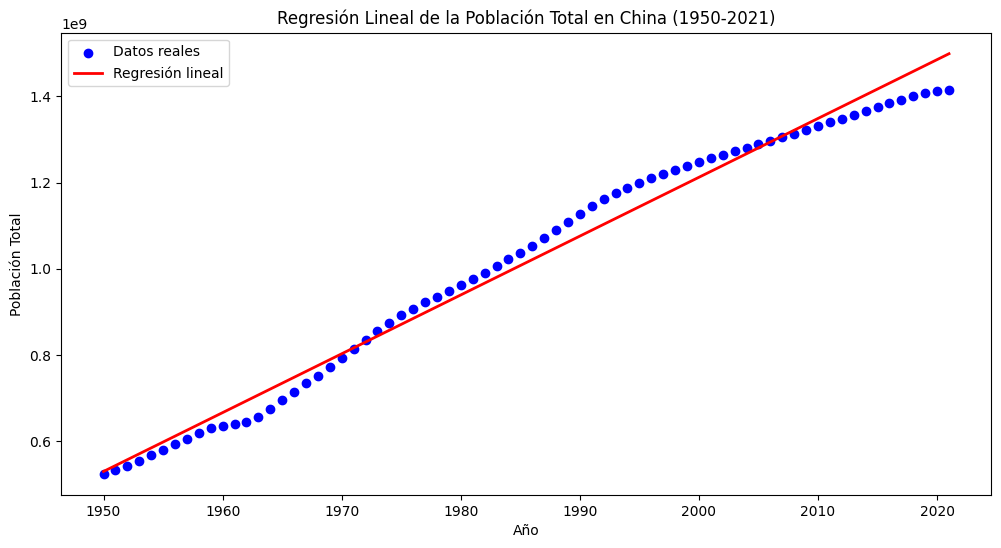

'\nEste código genera una gráfica de dispersión de los datos reales de población total para el país seleccionado (China) junto con la línea de regresión lineal que\nrepresenta la tendencia general del crecimiento poblacional desde 1950 hasta 2021. Puedes cambiar la variable pais para analizar diferentes países en tu conjunto\nde datos.\n'

In [46]:
# Visualización de los resultados
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regresión lineal')
plt.title(f'Regresión Lineal de la Población Total en {pais} (1950-2021)')
plt.xlabel('Año')
plt.ylabel('Población Total')
plt.legend()
plt.show()

"""
Este código genera una gráfica de dispersión de los datos reales de población total para el país seleccionado (China) junto con la línea de regresión lineal que
representa la tendencia general del crecimiento poblacional desde 1950 hasta 2021. Puedes cambiar la variable pais para analizar diferentes países en tu conjunto
de datos.
"""

## Crecimiento de la Población de Jóvenes de 1 a 19 años

### Modelo SVM

In [ ]:
# Calcular la población total de jóvenes (1-19 años) sumando las respectivas columnas
df['Población Jóvenes'] = df.iloc[:, 2:6].sum(axis=1)

In [ ]:
pais = "United States"
data_pais = df[df['Nombre_País'] == pais]

In [ ]:
# Preparar los datos para la regresión SVM
X = data_pais[['Año']].values
y = data_pais['Población Jóvenes'].values

In [ ]:
# Crear el modelo de SVM
modelo = SVR(kernel='linear')
modelo.fit(X, y)

SVR(kernel='linear')

In [ ]:
# Predicciones
y_pred = modelo.predict(X)

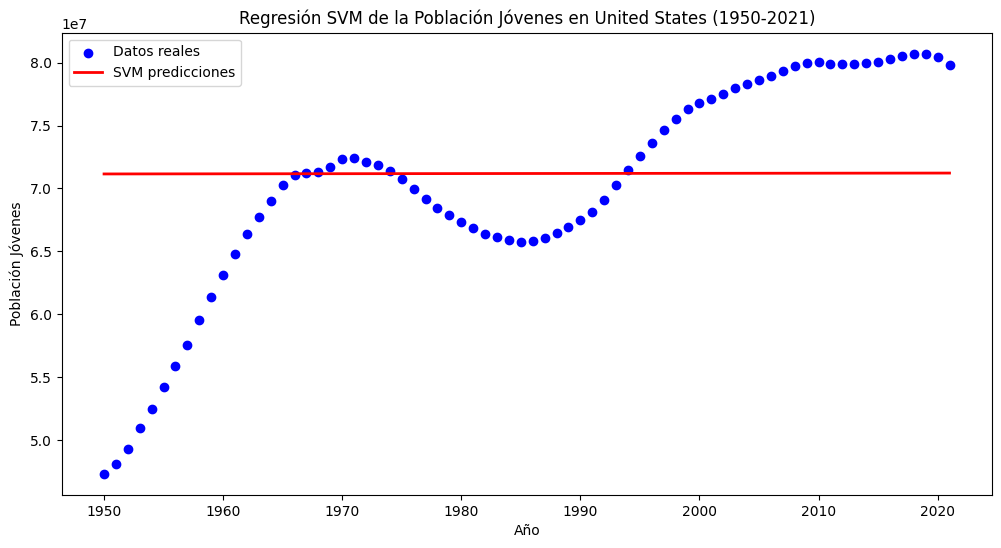

'\nEste código genera una gráfica de dispersión de los datos reales de la población joven (1 a 19 años) para el país seleccionado (United States) junto con la línea\nde predicción del modelo SVM que representa la tendencia de crecimiento de esta población desde 1950 hasta 2021.\n\nLos puntos azules muestran los datos históricos reales de población joven, y la línea roja muestra la tendencia estimada por el modelo SVM para esos datos a lo largo\ndel tiempo.\n\n'

In [ ]:
# Visualización de los resultados
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='SVM predicciones')
plt.title(f'Regresión SVM de la Población Jóvenes en {pais} (1950-2021)')
plt.xlabel('Año')
plt.ylabel('Población Jóvenes')
plt.legend()
plt.show()

"""
Este código genera una gráfica de dispersión de los datos reales de la población joven (1 a 19 años) para el país seleccionado (United States) junto con la línea
de predicción del modelo SVM que representa la tendencia de crecimiento de esta población desde 1950 hasta 2021.

Los puntos azules muestran los datos históricos reales de población joven, y la línea roja muestra la tendencia estimada por el modelo SVM para esos datos a lo largo
del tiempo.

"""

## Crecimiento No Lineal de la Población Adulta entre los 20 a 59 años

### Arbol de decisión:

In [ ]:
# Calcular la población total adulta (20-59 años) sumando las respectivas columnas
df['Población Adulta'] = df.iloc[:, 6:10].sum(axis=1)

In [ ]:
# Seleccionar un país específico para el análisis
pais = "United Arab Emirates"
data_pais = df[df['Nombre_País'] == pais]

In [ ]:
# Preparar los datos para el modelo de árbol de decisión
X = data_pais[['Año']].values
y = data_pais['Población Adulta'].values

In [ ]:
# Crear el modelo de árbol de decisión
modelo = DecisionTreeRegressor()
modelo.fit(X, y)

DecisionTreeRegressor()

In [ ]:
# Predicciones
y_pred = modelo.predict(X)

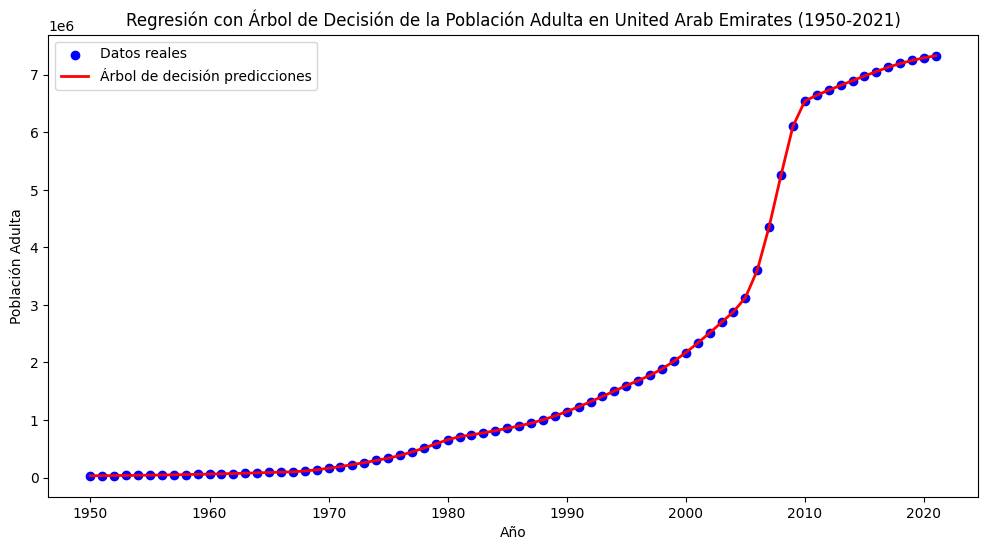

'\nEl análisis del crecimiento no lineal de la población adulta en India utilizando un modelo de árboles de decisión revela tendencias complejas en la evolución\ndemográfica del país desde 1950 hasta 2021.\n\nSe observa que la población adulta ha experimentado cambios significativos a lo largo del tiempo, con períodos de crecimiento rápido y otros de crecimiento más lento\no estable.\n\nEste modelo captura la tendencia general del crecimiento de la población adulta, reflejando las fluctuaciones y patrones no lineales que caracterizan el cambio\ndemográfico. Las predicciones del árbol de decisión muestran cómo la población adulta ha crecido de manera irregular, adaptándose a los datos reales y proporcionando\nuna visión detallada de las variaciones en diferentes períodos.\n'

In [ ]:
# Visualización de los resultados
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Árbol de decisión predicciones')
plt.title(f'Regresión con Árbol de Decisión de la Población Adulta en {pais} (1950-2021)')
plt.xlabel('Año')
plt.ylabel('Población Adulta')
plt.legend()
plt.show()

"""
El análisis del crecimiento no lineal de la población adulta en India utilizando un modelo de árboles de decisión revela tendencias complejas en la evolución
demográfica del país desde 1950 hasta 2021.

Se observa que la población adulta ha experimentado cambios significativos a lo largo del tiempo, con períodos de crecimiento rápido y otros de crecimiento más lento
o estable.

Este modelo captura la tendencia general del crecimiento de la población adulta, reflejando las fluctuaciones y patrones no lineales que caracterizan el cambio
demográfico. Las predicciones del árbol de decisión muestran cómo la población adulta ha crecido de manera irregular, adaptándose a los datos reales y proporcionando
una visión detallada de las variaciones en diferentes períodos.
"""

## Crecimiento de la Población de Ancianos

### Modelo K-NN

---



In [ ]:
# Calcular la población total de ancianos (60 años en adelante)
df['Población Ancianos'] = df.iloc[:, 10:].sum(axis=1)

In [ ]:
# Seleccionar un país específico para el análisis
pais = "Portugal"
data_pais = df[df['Nombre_País'] == pais]

In [ ]:
# Preparar los datos para el modelo K-NN
X = data_pais[['Año']].values
y = data_pais['Población Ancianos'].values

In [ ]:
# Crear y ajustar el modelo K-NN
modelo = KNeighborsRegressor(n_neighbors=5)
modelo.fit(X, y)

KNeighborsRegressor()

In [ ]:
# Predicciones
y_pred = modelo.predict(X)

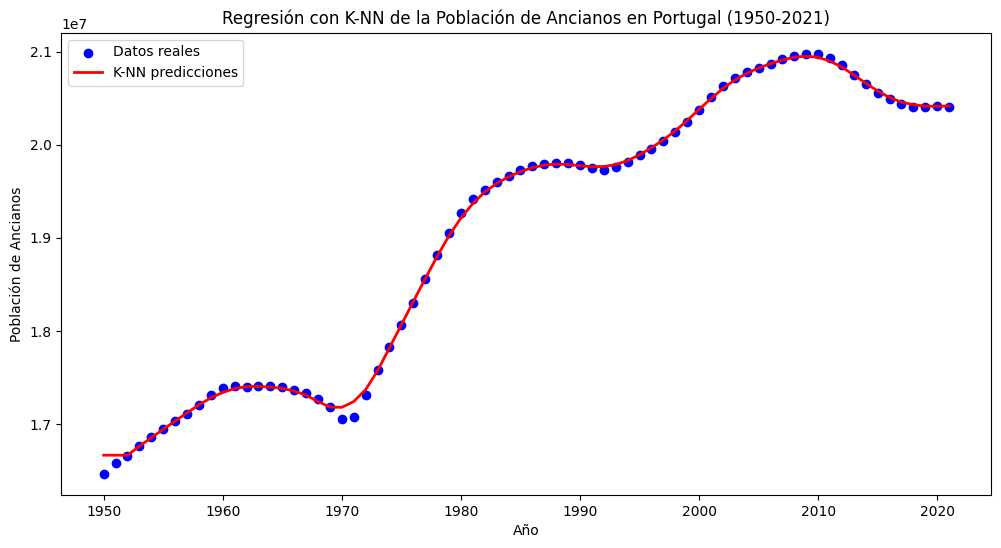

'\nEl análisis del crecimiento de la población de ancianos en Portugal utilizando un modelo de K-Nearest Neighbors (K-NN) revela importantes tendencias en la evolución\ndemográfica del país desde 1950 hasta 2021.\n\nPuntos Azules (Datos Reales): Los puntos azules en la gráfica representan los datos históricos reales de la población de ancianos (60 años en adelante) en Russia.\nSe observa que la población de ancianos ha aumentado significativamente a lo largo del tiempo, reflejando el envejecimiento de la población y el aumento de la\nesperanza de vida.\n\nLínea Roja (Predicciones del K-NN): La línea roja muestra las predicciones del modelo K-NN. Este modelo captura la tendencia general del crecimiento de la población\nde ancianos, adaptándose a las variaciones y proporcionando una visión detallada de cómo ha evolucionado esta franja etaria a lo largo de las décadas.\n\n'

In [ ]:
# Visualización de los resultados
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='K-NN predicciones')
plt.title(f'Regresión con K-NN de la Población de Ancianos en {pais} (1950-2021)')
plt.xlabel('Año')
plt.ylabel('Población de Ancianos')
plt.legend()
plt.show()

"""
El análisis del crecimiento de la población de ancianos en Portugal utilizando un modelo de K-Nearest Neighbors (K-NN) revela importantes tendencias en la evolución
demográfica del país desde 1950 hasta 2021.

Puntos Azules (Datos Reales): Los puntos azules en la gráfica representan los datos históricos reales de la población de ancianos (60 años en adelante) en Russia.
Se observa que la población de ancianos ha aumentado significativamente a lo largo del tiempo, reflejando el envejecimiento de la población y el aumento de la
esperanza de vida.

Línea Roja (Predicciones del K-NN): La línea roja muestra las predicciones del modelo K-NN. Este modelo captura la tendencia general del crecimiento de la población
de ancianos, adaptándose a las variaciones y proporcionando una visión detallada de cómo ha evolucionado esta franja etaria a lo largo de las décadas.

"""

## Metodo Train Test Split

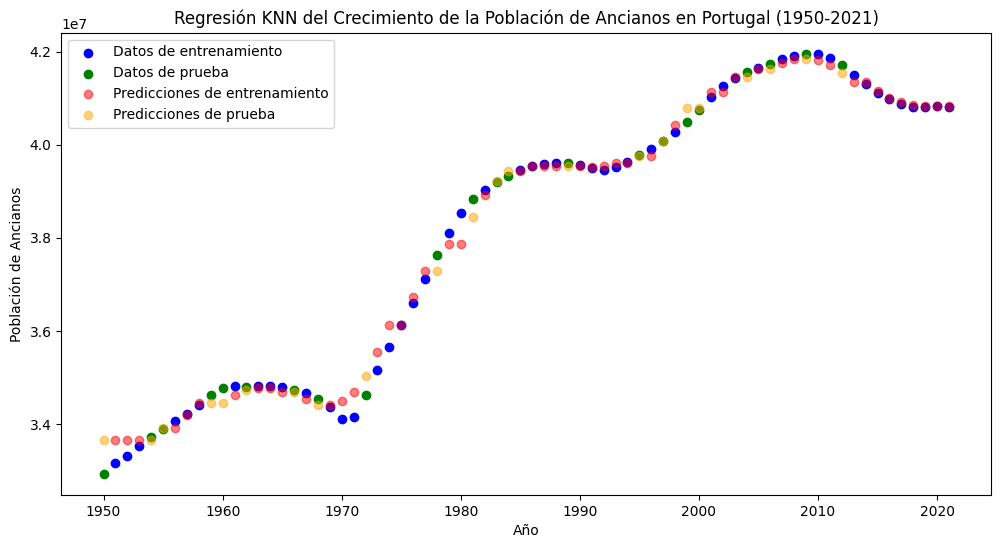

'\nEl análisis del crecimiento de la población de ancianos en Portugal utilizando el modelo KNN muestra cómo las predicciones del modelo (puntos rojos y naranjas) \nse ajustan a los datos reales (puntos azules y verdes). Los puntos rojos y naranjas representan las predicciones del modelo sobre los datos de entrenamiento y \nprueba, respectivamente. La visualización demuestra que el modelo KNN puede capturar patrones no lineales en los datos, proporcionando una aproximación más \nprecisa para ciertos casos en comparación con una regresión lineal simple.\n'

In [ ]:
# Calcular la población total de ancianos (60 años en adelante)
df['Población Ancianos'] = df.iloc[:, 10:].sum(axis=1)

# Seleccionar un país específico para el análisis
pais = "Portugal"
data_pais = df[df['Nombre_País'] == pais]

# Preparar los datos para el modelo K-NN
X = data_pais[['Año']].values
y = data_pais['Población Ancianos'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo KNN
modelo = KNeighborsRegressor(n_neighbors=5)
modelo.fit(X_train, y_train)

# Ajustar el modelo K-NN a los datos transformados
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

plt.figure(figsize=(12, 6))

# Visualizar los datos de entrenamiento y prueba
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de prueba')

# Visualizar las predicciones
plt.scatter(X_train, y_train_pred, color='red', label='Predicciones de entrenamiento', alpha=0.5)
plt.scatter(X_test, y_test_pred, color='orange', label='Predicciones de prueba', alpha=0.5)

plt.title(f'Regresión KNN del Crecimiento de la Población de Ancianos en {pais} (1950-2021)')
plt.xlabel('Año')
plt.ylabel('Población de Ancianos')
plt.legend()
plt.show()

"""
El análisis del crecimiento de la población de ancianos en Portugal utilizando el modelo KNN muestra cómo las predicciones del modelo (puntos rojos y naranjas)
se ajustan a los datos reales (puntos azules y verdes). Los puntos rojos y naranjas representan las predicciones del modelo sobre los datos de entrenamiento y
prueba, respectivamente. La visualización demuestra que el modelo KNN puede capturar patrones no lineales en los datos, proporcionando una aproximación más
precisa para ciertos casos en comparación con una regresión lineal simple.
"""


MAE en entrenamiento: 9691220.36
MSE en prueba: 801370725876437.62
RMSE en prueba: 28308492.12
R² en prueba: 0.01


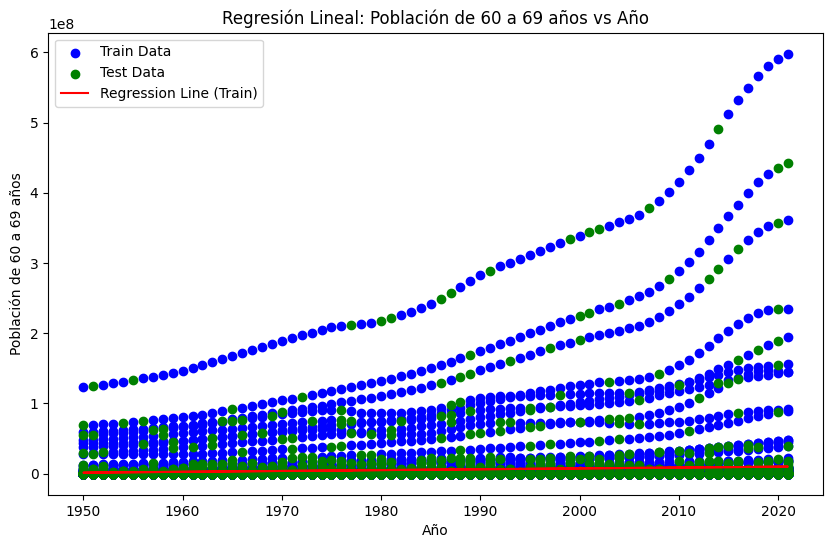

'\nEl modelo de regresión lineal se ha utilizado para predecir la población de personas de 60 a 69 años en función del año. Los datos se dividieron en conjuntos de \nentrenamiento y prueba con una proporción del 80% y 20%, respectivamente. A continuación se presentan las métricas de evaluación del modelo y una interpretación de \nlos resultados:\n\nMAE (Mean Absolute Error) en entrenamiento: 9691220.36\n\nEste valor indica que, en promedio, las predicciones del modelo están desviadas por aproximadamente 9.69 millones de personas en el conjunto de entrenamiento. \nUn MAE alto sugiere que el modelo no está capturando con precisión las fluctuaciones en la población de 60 a 69 años.\n\nMSE (Mean Squared Error) en prueba: 801370725876437.62\n\nEl MSE mide el promedio de los errores al cuadrado. Un MSE tan elevado indica que hay grandes errores de predicción en el conjunto de prueba. Esto también es reflejo \nde la gran variabilidad en los datos o de que el modelo no se ajusta bien a los dat

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dividir los datos en características (X) y variable objetivo (y)
X = df[['Año']].values  # Utilizamos el año como característica
y = df['Población de 60 a 69 años'].values  # La población de 60 a 69 años es nuestra variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

# Calcular las métricas de evaluación
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Imprimir los resultados
print(f'MAE en entrenamiento: {mae_train:.2f}')
print(f'MSE en prueba: {mse_test:.2f}')
print(f'RMSE en prueba: {rmse_test:.2f}')
print(f'R² en prueba: {r2_test:.2f}')

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, y_train_pred, color='red', label='Regression Line (Train)')
plt.xlabel('Año')
plt.ylabel('Población de 60 a 69 años')
plt.title('Regresión Lineal: Población de 60 a 69 años vs Año')
plt.legend()
plt.show()

"""
El modelo de regresión lineal se ha utilizado para predecir la población de personas de 60 a 69 años en función del año. Los datos se dividieron en conjuntos de
entrenamiento y prueba con una proporción del 80% y 20%, respectivamente. A continuación se presentan las métricas de evaluación del modelo y una interpretación de
los resultados:

MAE (Mean Absolute Error) en entrenamiento: 9691220.36

Este valor indica que, en promedio, las predicciones del modelo están desviadas por aproximadamente 9.69 millones de personas en el conjunto de entrenamiento.
Un MAE alto sugiere que el modelo no está capturando con precisión las fluctuaciones en la población de 60 a 69 años.

MSE (Mean Squared Error) en prueba: 801370725876437.62

El MSE mide el promedio de los errores al cuadrado. Un MSE tan elevado indica que hay grandes errores de predicción en el conjunto de prueba. Esto también es reflejo
de la gran variabilidad en los datos o de que el modelo no se ajusta bien a los datos.

RMSE (Root Mean Squared Error) en prueba: 28308492.12

El RMSE es la raíz cuadrada del MSE y se expresa en las mismas unidades que la variable objetivo (población en este caso). Un RMSE de 35.79 millones también sugiere
que el modelo tiene un error significativo en sus predicciones.

R² (Coeficiente de Determinación) en prueba: 0.01

El valor de R² indica qué proporción de la variabilidad en la variable dependiente (población de 60 a 69 años) es explicada por el modelo. Un valor negativo de -0.59 sugiere que el modelo está peor que un modelo que simplemente predice la media de la población, lo que significa que el modelo no es adecuado para los datos en cuestión.
"""


## Conclusión

Este proyecto se centró en analizar la evolución de la población mundial desde 1950 hasta 2021. A través de técnicas de análisis exploratorio de datos (EDA), modelos de regresión y métodos para la identificación y tratamiento de valores atípicos y perdidos, logramos obtener una comprensión profunda de las tendencias demográficas y las implicaciones para políticas futuras.

**Análisis Exploratorio de Datos (EDA)**

* Distribución de Datos: Se exploraron las distribuciones de la población por edades y años, identificando tendencias de crecimiento y variaciones.

* Correlaciones: Se evaluaron las correlaciones entre diferentes grupos de edad para entender mejor las dinámicas poblacionales.

* Identificación de Outliers: Se detectaron valores atípicos que podrían influir en los resultados del modelo predictivo.

* Valores Perdidos: Se aseguraron técnicas adecuadas para manejar cualquier valor perdido, garantizando la integridad del análisis.

**Modelado Predictivo**

* Modelos Utilizados: Se implementaron varios modelos, incluyendo Regresión Lineal y K-Nearest Neighbors (K-NN), para predecir la población en diferentes rangos de edad.

* Evaluación del Modelo: Utilizando métricas como MAE, MSE, RMSE y R², se evaluó el rendimiento de los modelos, destacando la dificultad de capturar la complejidad de las tendencias poblacionales únicamente con datos anuales.

